In [1]:
# ---------------- processing fluid inclusion data (microthermometry + Raman spectroscopy)


# --- import modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import plotly.express as px

# --- set working directories


base_dir = input("pick a folder : ")

# "C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Microthermometry/_data/"

pick a folder : C:/Users/u0125722/OneDrive - KU Leuven/Buranga/Microthermometry/_data/


In [56]:
# --- create dataframe from csv file using pandas import command 

df_FI = pd.read_csv(base_dir + "FI_data.csv", 
                    encoding = "ANSI", 
                   index_col = 0)


# --- add symbology to observations depending on the host phase

symbols =  {'Augelite' : 'triangle',
            'Bertossaite' : 'triangle',
            'Brazilianite' : 'triangle',
            'Montebrasite-F' : 'square',
            'Montebrasite-OH' : 'triangle',
            'Quartz' : 'circle',
            'Scorzalite' : 'triangle',
            'Trolleite' : 'square',
            'Wyllieite' : 'square'}

colors = {'Augelite' : 'yellow',
          'Bertossaite' : 'yellow',
          'Brazilianite' : 'green',
          'Montebrasite-F' : 'red',
          'Montebrasite-OH' : 'green',
          'Quartz' : 'grey',
          'Scorzalite' : 'green',
          'Trolleite' : 'orange',
          'Wyllieite' : 'red'}


df_FI['Color'] = df_FI['Host'].map(colors)
df_FI['Symbol'] = df_FI['Host'].map(symbols)


# --- print the colums of the imported dataframe - can be changed if necessary

print(df_FI.columns) 


df_FI

Index(['Date', 'sample', 'piece', 'field', 'Host', 'analysis', 'Length',
       'Width', 'Phases', 'VL (%)', 'VV (%)', 'V2 (%)', 'Vb', 'Tm CO2', 'Te',
       'Tm Hh', 'Tm H2O', 'Tm CL', 'Th CO2', 'Tm Xts', 'Th total', 'Hmg Mode',
       'Type', 'Color', 'Symbol'],
      dtype='object')


,Date,sample,piece,field,Host,analysis,Length,Width,Phases,VL (%),...,Tm Hh,Tm H2O,Tm CL,Th CO2,Tm Xts,Th total,Hmg Mode,Type,Color,Symbol
1,11/02/2019,BU18FA22,A,FF1,Quartz,1,9.1,7.4,L - V,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grey,circle
2,11/02/2019,BU18FA22,A,FF1,Quartz,2,9.8,7.8,L - V,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grey,circle
3,20/02/2019,BU18FA22,A,FF2,Quartz,1,24.8,13.3,L - V,73.0,...,-25.2,-19.1,0.6,NaN,NaN,NaN,NaN,NaN,grey,circle
4,11/02/2019,BU18FA22,A,FF2,Quartz,2,13.8,8.9,L - V,80.0,...,-25.2,-16.5,NaN,NaN,NaN,NaN,NaN,NaN,grey,circle
5,11/02/2019,BU18FA22,A,FF2,Quartz,3,14.1,10.2,L - V,77.0,...,-27.3,-17.2,0.1,NaN,NaN,NaN,NaN,NaN,grey,circle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,18/11/2021,BU18FA32,A.II,incC,Wyllieite,1,39.6,29.3,L - V - S,79.0,...,-18.8,-13.1,2.3,NaN,NaN,NaN,NaN,NaN,red,square
226,18/11/2021,BU18FA32,A.II,incC,Wyllieite,2,18.8,5.6,L - V - S,78.0,...,-21.3,-11.3,NaN,NaN,NaN,NaN,NaN,NaN,red,square
227,18/11/2021,BU18FA32,A.II,incC,Wyllieite,3,13.1,10.0,L - V - S,77.0,...,-24.4,-11.3,1.4,NaN,NaN,NaN,NaN,NaN,red,square
228,18/11/2021,BU18FA32,A.II,incC,Wyllieite,4,8.4,6.0,L - V - S,76.0,...,-22.3,-13.1,1.5,NaN,NaN,NaN,NaN,NaN,red,square


In [57]:
# --- calculate ratios of columns in the dataframe

# df_FI["Na/Li"] = df_FI['mNaCl (mol/kg)'] / df_FI['mLiCl (mol/kg)']
# df_FI["Na%"] = (100 * df_FI['mNaCl (mol/kg)'] * 0.05844) / (1 + (df_FI['mNaCl (mol/kg)'] * 0.05844) + (df_FI['mLiCl (mol/kg)'] * 0.04239))
# df_FI["Li%"] = (100 * df_FI['mLiCl (mol/kg)'] * 0.04239) / (1 + (df_FI['mNaCl (mol/kg)'] * 0.05844) + (df_FI['mLiCl (mol/kg)'] * 0.04239))
# df_FI["Na/Li%"] = df_FI['Na%'] / df_FI['Li%']
# df_FI["salinity"] = df_FI['Na%'] + df_FI['Li%']
# df_FI["mCl (mol/kg)"] = (df_FI['mNaCl (mol/kg)'] + df_FI['mLiCl (mol/kg)'])

# df_FI["N2/CO2"] = df_FI['XN2']/ df_FI['XCO2']


# df_FI["NaCl_mol"] = (df_FI['Bakker/Bodnar']*((100*df_FI['mNaCl(Dubois)']*0.05844)/(1+(df_FI['mNaCl(Dubois)']*0.05844)+(df_FI['mLiCl(Dubois)']*0.04239)))/58.44277)
# df_FI["LiCl_mol"] = (df_FI['Bakker/Bodnar']*((100*df_FI['mLiCl(Dubois)']*0.04239)/(1+(df_FI['mNaCl(Dubois)']*0.05844)+(df_FI['mLiCl(Dubois)']*0.04239)))/42.394)
# df_FI["Li/Na_mol"] = df_FI['mLiCl(Dubois)']/ df_FI['mNaCl(Dubois)']
# df_FI["Li/Na_mol2"] = (df_FI['LiCl%']/42.394)/(df_FI['NaCl%']/58.44277)





In [5]:
# --- create standard dataframe from csv 

df_std = pd.read_csv(base_dir + "FI_standards.csv", 
                    encoding = "ANSI",index_col=0, header=0).T

print(df_std.columns)

df_std

Index(['Standard', '3/12/2018', '21/12/2018', '7/01/2019', '11/02/2019',
       '20/02/2019', '20/03/2019', '24/04/2019', '26/04/2019', '29/04/2019',
       '18/06/2019', '18/07/2019', '8/08/2019', '27/07/2021', '3/08/2021',
       '16/08/2021', '13/09/2021', '20/09/2021', '6/10/2021', '13/10/2021',
       '21/10/2021', '28/10/2021', '18/11/2021'],
      dtype='object')


,Standard,3/12/2018,21/12/2018,7/01/2019,11/02/2019,20/02/2019,20/03/2019,24/04/2019,26/04/2019,29/04/2019,...,27/07/2021,3/08/2021,16/08/2021,13/09/2021,20/09/2021,6/10/2021,13/10/2021,21/10/2021,28/10/2021,18/11/2021
CO2 melting,-56.6,-59.2,-57.6,-57.8,-57.6,-56.9,-57.0,-56.8,-57.1,-56.9,...,-58.1,-58.0,-56.9,-56.7,-56.6,-57.4,-56.9,-57.0,-56.9,-57.5
CL melting,10.0,10.0,10.0,10.0,10.0,10.1,10.2,10.1,10.2,10.1,...,10.1,10.0,10.1,10.1,10.1,10.1,10.1,10.1,10.1,10.0
CO2 homog,31.1,31.5,31.3,31.1,31.2,31.0,30.7,31.1,31.1,31.1,...,31.2,31.2,31.0,31.1,31.1,31.1,31.1,31.1,31.1,31.1
H2O-NaCl melting,-21.2,-21.9,-22.0,-21.6,-21.7,-21.2,-21.4,-21.3,-21.4,-21.2,...,-21.2,-21.2,-21.4,-21.1,-21.2,-21.3,-21.1,-21.3,-21.2,-21.2
KCl melting,-10.5,-10.9,-10.6,-11.0,-11.2,-10.7,-10.7,-10.8,-11.3,-10.9,...,-10.8,-10.6,-10.5,-10.6,-10.6,-10.8,-10.7,-10.9,-10.7,-10.7
H2O melting,0.0,-0.2,-0.1,-0.1,-0.2,-0.2,-0.2,0.1,-0.2,0.0,...,-0.2,0.0,0.0,0.0,0.1,-0.1,0.1,0.1,0.0,0.1


{'3/12/2018': (0.9671329690881035, 0.3056069221278131), '21/12/2018': (0.9852339749915826, 0.17941079576458865), '7/01/2019': (0.9857489242141172, 0.24933280936289848), '11/02/2019': (0.9867935303039075, 0.27437995834056456), '20/02/2019': (0.9974182997665206, 0.09605609313605182), '20/03/2019': (0.9979140579984189, 0.18317340118723674), '24/04/2019': (0.9967522050544694, 0.040900826765451), '26/04/2019': (0.9929733481102493, 0.19296700882819331), '29/04/2019': (0.9960705549729215, 0.06869542128426835), '18/06/2019': (0.9972456111918138, -0.021667858624396606), '18/07/2019': (0.9919475498395687, 0.06891373204989229), '8/08/2019': (0.9859499780701194, 0.30028565168082066), '27/07/2021': (0.9827031038824526, 0.15874201504003116), '3/08/2021': (0.9839238488963381, 0.1031165093936775), '16/08/2021': (0.9965954764495398, 0.056267371107175335), '13/09/2021': (0.9987405973550307, -0.009907300807093514), '20/09/2021': (0.9993583218268011, -0.021703840326278263), '6/10/2021': (0.990618177656752

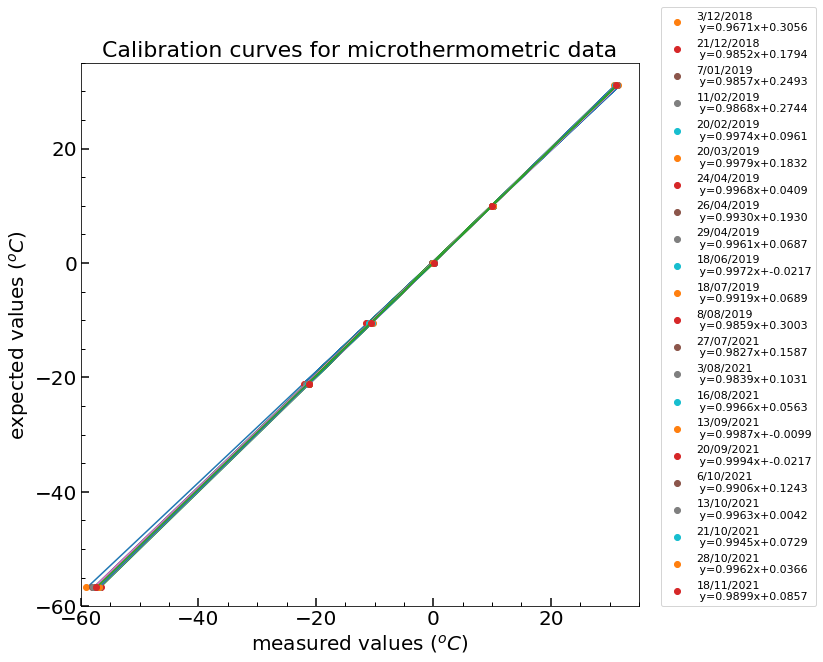

In [23]:
# --- plot standard data to obtain correction values

a = list(df_std.columns[1:]) #list with each entry date (column names) in the dataset
y = list(df_std["Standard"]) #list with expected values for the standards

calibration_dict = dict()

    # -- plot measured data against the expected values from the fluid inclusion standards

fig, ax = plt.subplots(figsize=(10,10))

for item in range(len(df_std.columns[1:])):  # loop to plot measurements for each entry date

    x = list(df_std[a[item]]) #list with measured values for the current entry date
    
        # - here the data are fitted by a linear model to obtain the correction equation
        
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    plt.plot(x,p(x),"-") #plot fitted line
    plt.plot(x,y,'o', label=a[item]+"\n y=%.4fx+%.4f"%(z[0],z[1]), alpha=1)    #plot standards data with entry date fitted equation in the legend
    
             
        # - create a dictionary with the correction equation values
    calibration_dict[a[item]] = (z[0],z[1])
    
        
print(calibration_dict)   

    # -- adjust plot parameters

plt.legend(loc=(1.04,0),fontsize=11)

    
plt.xlabel("measured values ($^{o}C$)",fontsize=20)
plt.xlim([-60,35])
plt.ylabel("expected values ($^{o}C$)",fontsize=20)
plt.ylim([-60,35])

ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator())

ax.tick_params(axis='both', which='major',labelsize=20,direction='in',width=1.5,length=8)
ax.tick_params(axis='both', which='minor',direction='in',width=1,length=4)

plt.title("Calibration curves for microthermometric data",horizontalalignment='center',fontsize=22)



#fig.write_image("FI_N2-Co2_vs_Li-Na_mass.pdf")

plt.show()


In [58]:
# --- Use formula from calibration trendline to correct measured unknown data

    # -- remove unwanted data that could block the calculation
    
df_corrected = df_FI.drop(['sample', 'piece', 'field', 'Host', 'analysis', 'Length',
       'Width', 'Phases', 'VL (%)', 'VV (%)', 'V2 (%)', 'Vb','Hmg Mode',
       'Type', 'Color', 'Symbol'], axis=1).T
    
 
    
#  'XCO2', 'XN2', 'XCH4','Modelling (Dubois, 2010)', 'mNaCl (mol/kg)',
#        'mLiCl (mol/kg)', 'Na/Li', 'Na%', 'Li%', 'Na/Li%', 'salinity',
#        'mCl (mol/kg)', 'N2/CO2'


    # -- save important metadata to a separate dataframe
    
df_corrected_metadata = df_FI[['sample', 'piece', 'field', 'Host', 'analysis', 
                               'Length', 'Width', 'Phases', 'VL (%)','Hmg Mode','Type','Color', 'Symbol']]

# print(df_corrected)
# print(df_corrected.index)
df_corrected = df_corrected.drop(index=['Tm Xts','Th total'])


    # -- walk through dataframe columns to perfom calculation according to calibration trendline
    
for column, values in df_corrected.iteritems():
#     print(column, '\n', values,'\n')
#     print(calibration_dict[values[0]][0], calibration_dict[values[0]][1],'\n')
#     print(df_corrected[column][1:],'\n\n')
#     print(df_corrected[column])

        # - grab values from calibration dictionary to perform calculations
    df_corrected[column][1:] = (df_corrected[column][1:]*calibration_dict[values[0]][0]) + calibration_dict[values[0]][1]


    # -- transpose back the dataframe to usual position and concatenate with metadata
    
df_corrected = df_corrected.T
df_corrected = pd.concat([df_corrected_metadata,df_corrected], axis=1)

df_corrected = df_corrected.drop(['Date'], axis=1)



# df_corrected[['XCO2', 'XN2', 'XCH4', 'N2/CO2','mNaCl (mol/kg)','mLiCl (mol/kg)', 
#               'Na/Li', 'Na%', 'Li%', 'Na/Li%', 'salinity',
#               'mCl (mol/kg)']] = df_FI[['XCO2', 'XN2', 'XCH4', 'N2/CO2','mNaCl (mol/kg)',
#                                         'mLiCl (mol/kg)', 'Na/Li', 'Na%', 'Li%', 'Na/Li%', 'salinity','mCl (mol/kg)']]




# df_corrected[['sample','piece','field','extra']]=df_corrected["Sample"].str.split(pat=' ', expand=True)


df_corrected = df_corrected[['sample','piece', 'field', 'analysis', 'Host',
                            'Length', 'Width', 'Phases', 'VL (%)', 
                            'Tm CO2','Te', 'Tm Hh', 'Tm H2O', 'Tm CL', 
                            'Th CO2','Hmg Mode','Type','Color', 'Symbol']]
#                             'Tm Xts', 'Th total']]
#                             'XCO2', 'XN2', 'XCH4', 'N2/CO2', 
#                             'mNaCl (mol/kg)', 'mLiCl (mol/kg)','Na/Li', 
#                             'Na%', 'Li%', 'Na/Li%', 'salinity', 'mCl (mol/kg)']]


df_corrected.to_csv(base_dir +'Buranga_microthermometry_processed.csv')
df_corrected


,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),Tm CO2,Te,Tm Hh,Tm H2O,Tm CL,Th CO2,Hmg Mode,Type,Color,Symbol
1,BU18FA22,A,FF1,1,Quartz,9.1,7.4,L - V,75.0,-57.453042,-62.880406,NaN,NaN,NaN,NaN,NaN,NaN,grey,circle
2,BU18FA22,A,FF1,2,Quartz,9.8,7.8,L - V,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grey,circle
3,BU18FA22,A,FF2,1,Quartz,24.8,13.3,L - V,73.0,-61.943362,-72.914963,-25.038885,-18.954633,0.694507,NaN,NaN,NaN,grey,circle
4,BU18FA22,A,FF2,2,Quartz,13.8,8.9,L - V,80.0,NaN,-24.592817,-24.592817,-16.007713,NaN,NaN,NaN,NaN,grey,circle
5,BU18FA22,A,FF2,3,Quartz,14.1,10.2,L - V,77.0,-57.6504,-26.665083,-26.665083,-16.698469,0.373059,NaN,NaN,NaN,grey,circle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,BU18FA32,A.II,incC,1,Wyllieite,39.6,29.3,L - V - S,79.0,NaN,NaN,-18.524804,-12.882261,2.362505,NaN,NaN,NaN,red,square
226,BU18FA32,A.II,incC,2,Wyllieite,18.8,5.6,L - V - S,78.0,NaN,NaN,-20.999603,-11.100405,NaN,NaN,NaN,NaN,red,square
227,BU18FA32,A.II,incC,3,Wyllieite,13.1,10.0,L - V - S,77.0,NaN,NaN,-24.068355,-11.100405,1.471577,NaN,NaN,NaN,red,square
228,BU18FA32,A.II,incC,4,Wyllieite,8.4,6.0,L - V - S,76.0,NaN,NaN,-21.989523,-12.882261,1.570569,NaN,NaN,NaN,red,square


In [59]:
# --- plot figures

fig = px.scatter(df_corrected, x="Tm H2O", y="Tm CL",
                 symbol = "Phases", color="Host", 
                 hover_data=["sample",'piece','field',"analysis","Phases","Host"],
                 width=650, height=500)

fig.update_layout(plot_bgcolor="white",template="simple_white")

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

fig.update_xaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")#,range=(0,7))
fig.update_yaxes(ticks='inside',zeroline=True,linecolor="black",showgrid=False,mirror= "allticks")#,range=(0,0.35))

# fig.update_xaxes(tickvals=[0,1,2,3,4,5,6,7])

# fig.write_image("FI_N2-Co2_vs_NaLi_mol.pdf");
fig.show()


In [38]:
# --- Use formula from Bodnar(1993) GCA 57 to calculate the salinity in the H20-NaCl system

x = -(df_corrected['Tm H2O']) # get the freezing point depression temperature value

df_corrected['Bodnar'] = 0.00 + 1.78*x - 0.0442*(x**2) + 0.000557*(x**3)

df_corrected

,sample,piece,field,analysis,Host,Length,Width,Phases,VL (%),Tm CO2,Te,Tm Hh,Tm H2O,Tm CL,Th CO2,Bodnar
34,BU18FA20,C,FF1,1,Bertossaite,89.7,26.5,L - L - V,78.0,-58.394382,-76.157252,-24.565095,-12.390544,-1.812655,27.326436,16.328899
35,BU18FA20,C,FF1,2,Bertossaite,26.5,19.0,L - L - V,76.0,-58.693756,-74.460798,-25.263635,-12.390544,-3.010152,27.326436,16.328899
36,BU18FA20,C,FF1,3,Bertossaite,15.0,7.5,L - L - V,77.0,-58.494173,-74.361007,-26.161758,-11.891587,-1.812655,27.526019,15.853354
37,BU18FA20,C,FF1,4,Bertossaite,13.9,10.5,L - L - V,74.0,-58.494173,-73.961841,-25.064052,-12.590127,-1.912446,27.226644,16.515819
97,BU18FA20,C,FF1,5,Bertossaite,28.2,18.0,L - V,80.0,-56.174512,-73.335205,-23.737827,-11.933652,-1.419008,27.049887,15.893907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,BU18FA32,A.II,incC,1,Wyllieite,39.6,29.3,L - V - S,79.0,0.085689,0.085689,-18.524804,-12.882261,2.362505,0.085689,16.786097
226,BU18FA32,A.II,incC,2,Wyllieite,18.8,5.6,L - V - S,78.0,0.085689,0.085689,-20.999603,-11.100405,0.085689,0.085689,15.074295
227,BU18FA32,A.II,incC,3,Wyllieite,13.1,10.0,L - V - S,77.0,0.085689,0.085689,-24.068355,-11.100405,1.471577,0.085689,15.074295
228,BU18FA32,A.II,incC,4,Wyllieite,8.4,6.0,L - V - S,76.0,0.085689,0.085689,-21.989523,-12.882261,1.570569,0.085689,16.786097
